In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('..')
import rwpropa as rw

### Simulation

In [19]:
sim = rw.Simulation()

nr_particles = 1*10**1
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
energy = 10**12 # eV
source = rw.PointSourceIsotropicPhi(energy, source_pos, nr_particles)
sim.add_source(source)

nr_steps = 1*10**5
step_size = 0.10001*10**10 # [m]
diffusion_coefficient = 1.5*10**20 # [m^2/s]
speed_of_light = 3*10**8 # [m/s]
mfp_iso = 3*diffusion_coefficient/speed_of_light
mfp = np.array([mfp_iso, mfp_iso, mfp_iso], dtype=np.float32)  # [m]
propagator = rw.IsotropicPropagator(mfp, nr_steps, step_size)
sim.add_propagator(propagator)

substeps = [False, False, True] # observe only steps (no substeps)
spheres = [10**10]
observer = rw.SphericalObserver(substeps, spheres, on_detection_deactivate=True)
sim.add_observer(observer)

%time sim.run_simulation()
sim.save_data('data/data_tut_5')

start simulation
Propagator initialized
Observer initialized
CPU times: user 2.15 ms, sys: 0 ns, total: 2.15 ms
Wall time: 2.18 ms
saved data file data/data_tut_5.pkl


### Analysis

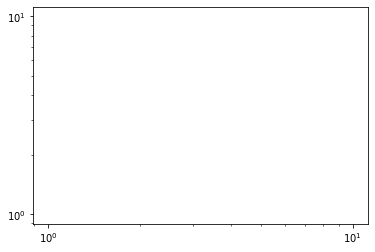

In [20]:
df = pd.read_pickle("data/data_tut_5.pkl")
bins = 10
hist, bins = np.histogram(df['d'], bins=bins)
logbins = np.logspace(np.log10(min(df['d'])),np.log10(max(df['d'])),len(bins))
plt.hist(df['d'], bins=logbins, alpha=0.5)

plt.loglog()
plt.show()

(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([1.00010004e+10, 1.00010004e+10, 1.00010004e+10, 1.00010004e+10,
        1.00010004e+10, 1.00010004e+10, 1.00010004e+10, 1.00010004e+10,
        1.00010004e+10, 1.00010004e+10, 1.00010004e+10]),
 <BarContainer object of 10 artists>)

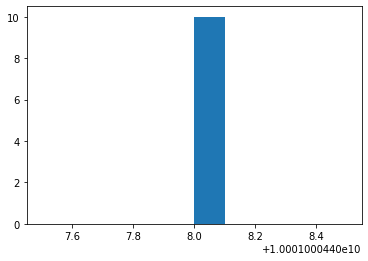

In [21]:
plt.hist(df['d'], bins=10)

In [22]:
df

,id,i,d,x,y,z,phi,pitch_angle,radius,sub_step
0,0.0,9.0,1.000100e+10,5.774080e+09,5.774080e+09,5.774080e+09,5.055130,0.955393,1.000000e+10,2.0
1,1.0,9.0,1.000100e+10,5.774080e+09,5.774080e+09,5.774080e+09,2.263722,0.955393,1.000000e+10,2.0
2,2.0,9.0,1.000100e+10,5.774080e+09,5.774080e+09,5.774080e+09,0.528321,0.955393,1.000000e+10,2.0
3,3.0,9.0,1.000100e+10,5.774080e+09,5.774080e+09,5.774080e+09,5.879675,4.096986,1.000000e+10,2.0
4,4.0,9.0,1.000100e+10,5.774080e+09,5.774080e+09,5.774080e+09,0.436383,4.096986,1.000000e+10,2.0
5,5.0,9.0,1.000100e+10,5.774080e+09,5.774080e+09,5.774080e+09,4.237248,0.955393,1.000000e+10,2.0
6,6.0,9.0,1.000100e+10,5.774080e+09,5.774080e+09,5.774080e+09,1.222037,4.096986,1.000000e+10,2.0
7,7.0,9.0,1.000100e+10,5.774080e+09,5.774080e+09,5.774080e+09,3.626790,4.096986,1.000000e+10,2.0
8,8.0,9.0,1.000100e+10,5.774080e+09,5.774080e+09,5.774080e+09,1.933777,4.096986,1.000000e+10,2.0
9,9.0,9.0,1.000100e+10,5.774080e+09,5.774080e+09,5.774080e+09,5.413868,0.955393,1.000000e+10,2.0


In [20]:
sim = rw.IsotropicSimulation(nr_particles = 10**2, energy = energy, nr_steps = nr_steps, diffusion_coefficient_para = diffusion_coefficient, nr_obs_steps = 600)
%time sim.simulate()

simulate with a diffusion coefficient of  1.5e+20 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file isotropic.pkl
CPU times: user 2min 37s, sys: 63.9 ms, total: 2min 37s
Wall time: 2min 37s


init statistics plotting class


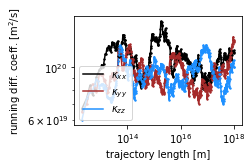

diffusion coefficients computed between 1.02e+17m and 1.02e+18m with 100 data points
kappa_{xx}: 1.05e+20 m²/s +- 9.1e+18 m²/s
kappa_{yy}: 9.88e+19 m²/s +- 1.27e+19 m²/s
kappa_{zz}: 9.2e+19 m²/s +- 1.2e+19 m²/s


In [21]:
df = pd.read_pickle("isotropic.pkl")
sta = rw.Statistics(df)
df_kappas = sta.plot_diffusion_coefficients(n_points_plateau=100)